# 환경설정

In [2]:
!pip install --upgrade pip
!pip install mediapipe-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.5/117.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 126.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 26.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 58.1

In [3]:
from google.colab import files
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

from mediapipe_model_maker import image_classifier

import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## 데이터 연결

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 수묵화_올빅뎃.zip 파일 압축 풀기

In [5]:
import zipfile
zip_path = '/content/drive/MyDrive/수묵화_올빅뎃.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('imagedata')


### 한글 경로 바꿔주기
- 한글 경로는 오류날 확률이 높아 영어명으로 바꿔주겠습니다.

In [6]:
import os
for idx in range(4):
  os.chdir('/content/imagedata/sumuk')
  
  dir_name = 'label'
  if idx <= 1:
    print(idx)
    dir_name = 'img'
    
  # Defining two dictionaries with old and new directory names
  dir_names_1 = {
      '01. ╟│░µ': '01. Live action photo', 
      '02. └╬╣░': '02. Animated image',
      '03. ╗τ╣░': '03. Famous western paintings'
  }

  dir_names_2 = {
      '01. ╜╟╗τ ╗τ┴°': '01. Landscape',
      '02. ╛╓┤╧╕▐└╠╝╟ └╠╣╠┴÷': '02. People',
      '03. └»╕φ ╝¡╛τ╚¡': '03. Things',
  }

  # Renaming directories using 'os' module functions
  for old_name, new_name in dir_names_1.items():
      # Change current working directory to the original path
      os.chdir(f'/content/imagedata/sumuk/{dir_name}')
      
      # Get old and new directory paths
      old_name_path = os.path.join(f'/content/imagedata/sumuk/{dir_name}', old_name)
      new_name_path = os.path.join(f'/content/imagedata/sumuk/{dir_name}', new_name)
      print(os.getcwd())
      print(os.listdir())
      # If the old directory name exists in the current working directory, rename it to the new directory name
      if old_name in os.listdir():
        
        # print(old_name_path)
        os.rename(old_name_path, new_name_path)
      
      # If the new directory name also exists in the current working directory
      elif new_name in os.listdir():
          # Change current working directory to the new directory path
          os.chdir(new_name_path)
          print(os.getcwd())
          print(os.listdir())
          # Iterate over each key-value pair in 'dir_names_2'
          for old_name, new_name in dir_names_2.items():
              # If the old directory name exists in the new directory path, rename it to the new directory name
              if old_name in os.listdir():
                  old_name_path_1 = os.path.join(new_name_path, old_name)
                  new_name_path_1 = os.path.join(new_name_path, new_name)
                  os.rename(old_name_path_1, new_name_path_1)


0
/content/imagedata/sumuk/img
['02. └╬╣░', '01. ╟│░µ', '03. ╗τ╣░']
/content/imagedata/sumuk/img
['02. └╬╣░', '03. ╗τ╣░', '01. Live action photo']
/content/imagedata/sumuk/img
['02. Animated image', '03. ╗τ╣░', '01. Live action photo']
1
/content/imagedata/sumuk/img
['02. Animated image', '03. Famous western paintings', '01. Live action photo']
/content/imagedata/sumuk/img/01. Live action photo
['02. ╛╓┤╧╕▐└╠╝╟ └╠╣╠┴÷', '03. └»╕φ ╝¡╛τ╚¡', '01. ╜╟╗τ ╗τ┴°']
/content/imagedata/sumuk/img
['02. Animated image', '03. Famous western paintings', '01. Live action photo']
/content/imagedata/sumuk/img/02. Animated image
['02. ╛╓┤╧╕▐└╠╝╟ └╠╣╠┴÷', '03. └»╕φ ╝¡╛τ╚¡', '01. ╜╟╗τ ╗τ┴°']
/content/imagedata/sumuk/img
['02. Animated image', '03. Famous western paintings', '01. Live action photo']
/content/imagedata/sumuk/img/03. Famous western paintings
['02. ╛╓┤╧╕▐└╠╝╟ └╠╣╠┴÷', '03. └»╕φ ╝¡╛τ╚¡', '01. ╜╟╗τ ╗τ┴°']
/content/imagedata/sumuk/label
['02. └╬╣░', '01. ╟│░µ', '03. ╗τ╣░']
/content/imagedata/sumuk

### 이미지 경로를 데이터 프레임 형태로 만드는 함수

In [7]:
from pathlib import Path
import json
import pandas as pd

# Create a Path object for the directory
dir_path = Path('/content/imagedata/sumuk/label')

# Get the paths of all JSON files in the directory and its subdirectories
json_paths = list(dir_path.glob('**/*.json'))
all_df = pd.DataFrame()


In [8]:
dir_ = Path('/content/imagedata/sumuk/img')
filepaths = list(dir_.glob(r'**/*.jpg'))

In [ ]:
str(filepaths[0]).split('/')[-1]

'img_2_1_0230(2180)_Scan_edit.jpg'

In [9]:
import os
import shutil

# Set the source and destination folders
source_folder = 'path/to/source/folder'
dest_folder = '/content/imagedata/sumuk/img_data'

# Check if the destination folder exists and create it if not
if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)

# Loop through all files in the source folder
for filename in filepaths:
  filename = str(filename)
  # Check if the file is an image
  if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
      # Move the file to the destination folder
      shutil.move(filename, os.path.join(dest_folder, str(filename).split('/')[-1]))
      print(f"Moved {filename} to {dest_folder}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Moved /content/imagedata/sumuk/img/02. Animated image/02. People/img_2_2_0738(2133)_Scan_edit.jpg to /content/imagedata/sumuk/img_data
Moved /content/imagedata/sumuk/img/02. Animated image/02. People/img_2_2_0533(3507)_Scan_edit.jpg to /content/imagedata/sumuk/img_data
Moved /content/imagedata/sumuk/img/02. Animated image/02. People/img_2_2_0831(3747)_Scan_edit.jpg to /content/imagedata/sumuk/img_data
Moved /content/imagedata/sumuk/img/02. Animated image/02. People/img_2_2_0926(6994)_Scan_edit.jpg to /content/imagedata/sumuk/img_data
Moved /content/imagedata/sumuk/img/02. Animated image/02. People/img_2_2_0933(7353)_Scan_edit.jpg to /content/imagedata/sumuk/img_data
Moved /content/imagedata/sumuk/img/02. Animated image/02. People/img_2_2_0434(2445)_Scan_edit.jpg to /content/imagedata/sumuk/img_data
Moved /content/imagedata/sumuk/img/02. Animated image/02. People/img_2_2_0919(5024)_Scan_edit.jpg to /content/imagedata/sumuk/img_data
Moved /content/imag

## DataFrame화 

### Test

In [ ]:

# Open the JSON file and read its contents
with open(json_paths[0], 'r') as f:
    data = json.load(f)
print(data)
to_df = {
    'Method' : data['annotation']['Paint']['Method'],

    'PaperType' : data['annotation']['PaperType'],
    'Difficulty' : data['annotation']['Difficulty'],
    'Typecategory' : data['images']['category'],
    'Targetcategory' : data['images']['target'],
    'Targetcategory_tmp' : data['dataset_info']['category'],
    'src_path' : data['annotation']['Paire'],
    'src_name' : data['images']['identifier'],
    'ImageWidth' : data['images']['width'],
    'ImageHeight' : data['images']['height'],
    'AnnotationWidth' : data['annotation']['Paint']['Width'],
    'AnnotationHeight' : data['annotation']['Paint']['Height'],

}
# Print the contents of the file
print(data['dataset_info']['category'])
df = pd.DataFrame(to_df, index=[0])

{'annotation': {'Paint': {'Method': 3, 'Width': 4206, 'Height': 3365}, 'Paire': 'img_2_1_0791(4909)_Scan_edit.jpg', 'PaperType': 1, 'Difficulty': 3}, 'dataset_info': {'identifier': None, 'name': '한국 전통 수묵화 화풍별 제작 데이터', 'src_path': './source', 'label_path': './labels', 'category': 1}, 'images': {'identifier': 'img_2_1_0791.jpg', 'type': 'Jpeg', 'width': 3161, 'height': 2474, 'captured': '2022-08-30T10:06:59.2623743+09:00', 'category': 1, 'target': 2, 'camera_model': None}}
1


### 반복

In [10]:
all_df = pd.DataFrame()
# Iterate over the JSON files and create dataframes
for i,json_path in enumerate(json_paths):
    # Load the JSON file into a Python object
    with open(json_path, 'r') as f:
        json_data = json.load(f)
    to_df = {
    'Method' : json_data['annotation']['Paint']['Method'],
    'PaperType' : json_data['annotation']['PaperType'],
    'Difficulty' : json_data['annotation']['Difficulty'],
    'Typecategory' : json_data['images']['category'],
    'Targetcategory' : json_data['images']['target'],
    'Datasetcategory' : json_data['dataset_info']['category'],
    'src_path':  os.path.join('/content/imagedata/sumuk/img_data', json_data['annotation']['Paire']), # json_path,
    'src_EditedName' : json_data['annotation']['Paire'],
    'src_name' : json_data['images']['identifier'],
    'ImageWidth' : json_data['images']['width'],
    'ImageHeight' : json_data['images']['height'],
    'AnnotationWidth' : json_data['annotation']['Paint']['Width'],
    'AnnotationHeight' : json_data['annotation']['Paint']['Height'],
    }
    # Convert the Python object to a Pandas dataframe
    df = pd.DataFrame(to_df, index=[i])
    all_df = pd.concat([all_df, df])
    # Print the dataframe
    # print(df)


In [11]:
def MakeLabel(num):
  if num <= 3:
    return 0 #'Baeknyo'
  elif num <= 7:
    return 1 # 'Gureuk'
  elif num <= 9:
    return 2 # 'Molgol'

def FixingRoute(originalPath):
  return str(originalPath).replace('label','img').replace('json','jpg').replace('_dataset','')

In [12]:
all_df['ForLearningLabel'] = all_df['Method'].apply(MakeLabel)
# all_df['src_path'] = all_df['src_path'].apply(FixingRoute)

In [13]:
all_df

,Method,PaperType,Difficulty,Typecategory,Targetcategory,Datasetcategory,src_path,src_EditedName,src_name,ImageWidth,ImageHeight,AnnotationWidth,AnnotationHeight,ForLearningLabel
0,3,1,3,1,2,1,/content/imagedata/sumuk/img_data/img_2_1_0791...,img_2_1_0791(4909)_Scan_edit.jpg,img_2_1_0791.jpg,3161,2474,4206,3365,0
1,1,1,3,1,2,1,/content/imagedata/sumuk/img_data/img_2_1_0165...,img_2_1_0165.p(1484)_Scan_edit.jpg,img_2_1_0165.p.jpg,6948,3606,4352,2448,0
2,9,2,1,1,2,1,/content/imagedata/sumuk/img_data/img_2_1_0104...,img_2_1_0104.p(2611)_Scan_edit.jpg,img_2_1_0104.p.jpg,1527,1920,3434,4350,2
3,9,1,3,1,2,1,/content/imagedata/sumuk/img_data/img_2_1_0028...,img_2_1_0028.p(481)_Scan_edit.jpg,img_2_1_0028.p.jpg,1920,1280,3507,4960,2
4,7,1,2,1,2,1,/content/imagedata/sumuk/img_data/img_2_1_0087...,img_2_1_0087(1980)_Scan_edit.jpg,img_2_1_0087.jpg,6609,4406,4631,3308,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7320,6,1,2,2,1,1,/content/imagedata/sumuk/img_data/img_1_2_0550...,img_1_2_0550(6122)_Scan_edit.jpg,img_1_2_0550.jpg,5000,3400,4629,3150,1
7321,4,1,3,2,1,1,/content/imagedata/sumuk/img_data/img_1_2_0563...,img_1_2_0563(6774)_Scan_edit.jpg,img_1_2_0563.jpg,3840,2160,4665,2649,1
7322,8,1,3,2,1,1,/content/imagedata/sumuk/img_data/img_1_2_0334...,img_1_2_0334(6150)_Scan_edit.jpg,img_1_2_0334.jpg,4000,5333,3208,4255,2
7323,3,2,1,2,1,1,/content/imagedata/sumuk/img_data/img_1_2_0644...,img_1_2_0644(7074)_Scan_edit.jpg,img_1_2_0644.jpg,3000,2000,4649,3150,0


### 저장하기

In [ ]:
all_df.to_csv('/content/drive/MyDrive/Production data for each Korean traditional ink painting style.csv', index=False, encoding='utf-8-sig')

In [14]:
df = all_df.loc[:,['src_path', 'ForLearningLabel']]
# Rename the 'a' column to 'x'
df = df.rename(columns={'src_path': 'Filepath', 'ForLearningLabel' : 'Label'})

In [25]:
dest_folder = '/content/imagedata/sumuk/img_data'
cnt = 0
for file_path, label in zip(df['Filepath'], df['Label']):
  dest_folder = '/content/imagedata/sumuk/img_data'
  dest_folder = os.path.join(dest_folder,str(label))

  if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)

  shutil.move(file_path, os.path.join(dest_folder, f"{label}_{cnt}.jpeg"))
  cnt += 1

FileNotFoundError: ignored

In [26]:
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

Number of pictures: 7325

Number of different labels: 3

Labels: ['0' '2' '1']


## 텐서플로우 이미지 분류

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [28]:
import pathlib

data_dir = "/content/imagedata/sumuk/img_data"

In [29]:
batch_size = 32
img_height = 180
img_width = 180

In [30]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6365 files belonging to 3 classes.
Using 5092 files for training.


In [31]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6365 files belonging to 3 classes.
Using 1273 files for validation.


In [32]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2']


## 데이터 시각화하기

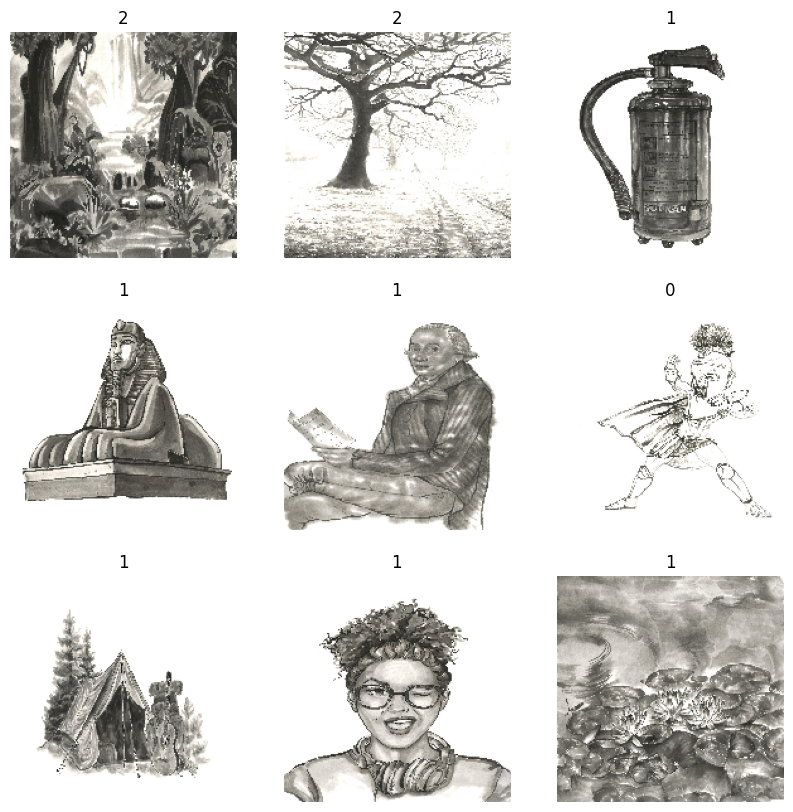

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [35]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 데이터 표준화하기
RGB 채널 값은 [0, 255] 범위에 있습니다. 이것은 신경망에 이상적이지 않습니다. 일반적으로 입력 값을 작게 만들어야 합니다.

여기에서 tf.keras.layers.Rescaling을 사용하여 값을 [0, 1] 범위로 표준화합니다

In [36]:
normalization_layer = layers.Rescaling(1./255)

In [37]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


0.08500132 1.0


## 기본 Keras 모델

In [38]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

#jpeg 체크

In [17]:
from glob import glob
import os 

dest_folder = '/content/imagedata/sumuk/img_data'
file_paths = glob(os.path.join(dest_folder,"*/*.jpeg"))

In [18]:
from struct import unpack
from tqdm import tqdm
import os
    
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}
    
class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()
    
    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]            
            if len(data)==0:
                break        
    
bads = []

for img in tqdm(file_paths):

  image = JPEG(img) 
  try:
    image.decode()   
  except:
    bads.append(img)




100%|██████████| 7325/7325 [03:21<00:00, 36.30it/s]


In [19]:
bads

['/content/imagedata/sumuk/img_data/1/1_1920.jpeg']

In [20]:
for name in bads:
  os.remove(name)

In [21]:
import cv2
img_embeddings = []
labels = []
for file in file_paths:
  # tmp_img = cv2.imread(file)
  # img_embeddings.append(tmp_img)


  label = file.split('/')[-2]
  labels.append(label)

In [22]:
import pandas as pd
df = pd.DataFrame({
    'Filepath' : file_paths,
    'Label' : labels,
    # 'img' : img_embeddings
    })

In [23]:
df

,Filepath,Label
0,/content/imagedata/sumuk/img_data/0/0_7009.jpeg,0
1,/content/imagedata/sumuk/img_data/0/0_1249.jpeg,0
2,/content/imagedata/sumuk/img_data/0/0_5869.jpeg,0
3,/content/imagedata/sumuk/img_data/0/0_2901.jpeg,0
4,/content/imagedata/sumuk/img_data/0/0_6655.jpeg,0
...,...,...
7320,/content/imagedata/sumuk/img_data/1/1_4028.jpeg,1
7321,/content/imagedata/sumuk/img_data/1/1_3375.jpeg,1
7322,/content/imagedata/sumuk/img_data/1/1_3473.jpeg,1
7323,/content/imagedata/sumuk/img_data/1/1_7148.jpeg,1


In [41]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
160/160 [==============================] - 250s 2s/step - loss: 0.6713 - accuracy: 0.6695 - val_loss: 0.4626 - val_accuracy: 0.7895
Epoch 2/10
160/160 [==============================] - 144s 903ms/step - loss: 0.5011 - accuracy: 0.7761 - val_loss: 0.4154 - val_accuracy: 0.8217
Epoch 3/10
160/160 [==============================] - 133s 829ms/step - loss: 0.4259 - accuracy: 0.8134 - val_loss: 0.5493 - val_accuracy: 0.7675
Epoch 4/10
160/160 [==============================] - 134s 836ms/step - loss: 0.3794 - accuracy: 0.8295 - val_loss: 0.5231 - val_accuracy: 0.7604
Epoch 5/10
160/160 [==============================] - 135s 846ms/step - loss: 0.3145 - accuracy: 0.8651 - val_loss: 0.4594 - val_accuracy: 0.7950
Epoch 6/10
160/160 [==============================] - 139s 868ms/step - loss: 0.2327 - accuracy: 0.9067 - val_loss: 0.3801 - val_accuracy: 0.8390
Epoch 7/10
160/160 [==============================] - 130s 816ms/step - loss: 0.1863 - accuracy: 0.9281 - val_loss: 0.5448 - va

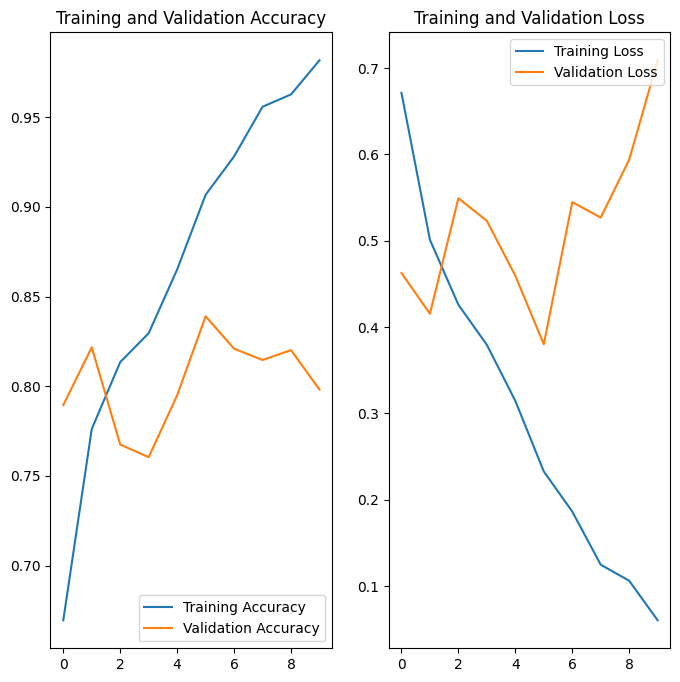

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 데이터 증강

In [43]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

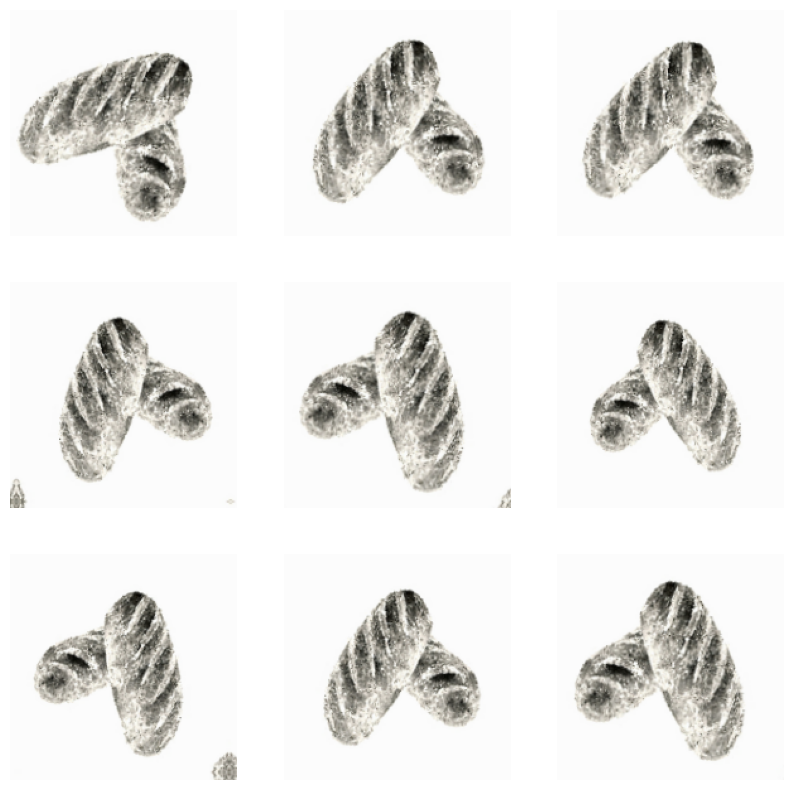

In [44]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## 드롭아웃

In [45]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [47]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


160/160 [==============================] - 162s 997ms/step - loss: 0.7766 - accuracy: 0.5817 - val_loss: 0.6559 - val_accuracy: 0.6057
Epoch 2/15
160/160 [==============================] - 157s 982ms/step - loss: 0.5964 - accuracy: 0.6868 - val_loss: 0.6131 - val_accuracy: 0.6544
Epoch 3/15
160/160 [==============================] - 152s 947ms/step - loss: 0.5634 - accuracy: 0.6923 - val_loss: 0.5771 - val_accuracy: 0.6881
Epoch 4/15
160/160 [==============================] - 155s 968ms/step - loss: 0.5324 - accuracy: 0.7245 - val_loss: 0.7116 - val_accuracy: 0.6559
Epoch 5/15
160/160 [==============================] - 155s 967ms/step - loss: 0.5222 - accuracy: 0.7282 - val_loss: 0.7190 - val_accuracy: 0.6661
Epoch 6/15
160/160 [==============================] - 165s 1s/step - loss: 0.5199 - accuracy: 0.7304 - val_loss: 0.5710 - val_accuracy: 0.6819
Epoch 7/15
160/160 [==============================] - 155s 970ms/step - loss: 0.5111 - accuracy: 0.7349 - val_loss: 1.0963 - val_accuracy:

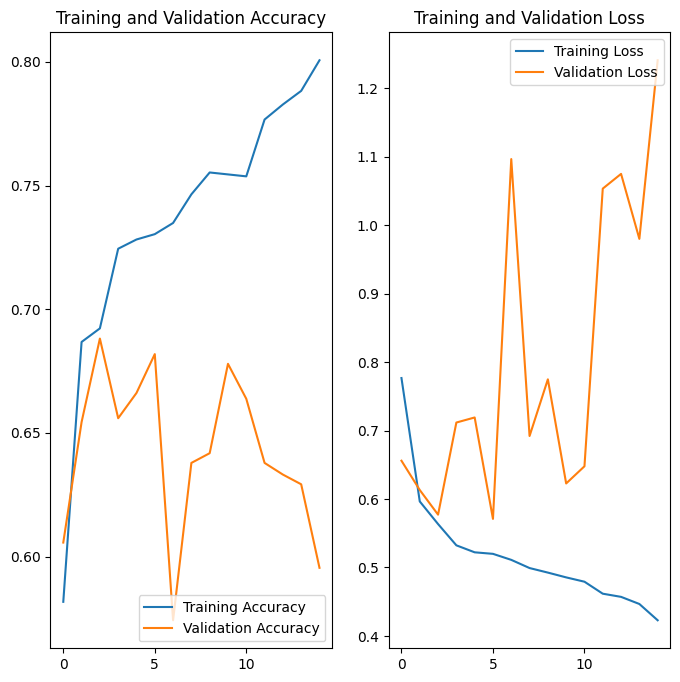

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 데이터 유추

In [ ]:
Gureuk_url = "https://mblogthumb-phinf.pstatic.net/20130822_105/doyacart_1377159585895mFqFx_JPEG/%B1%B8%B8%A4.jpg?type=w2"
Gureuk_path = tf.keras.utils.get_file('Gureuk', origin=Gureuk_url)

img = tf.keras.utils.load_img(
    Gureuk_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

## 이미지 데이터 확인

In [ ]:
# import os.path
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from google.colab import files
import os
assert tf.__version__.startswith('2')
from mediapipe_model_maker import image_classifier
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
from time import perf_counter

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report,accuracy_score
# from IPython.display import Markdown, display

RuntimeError: ignored

RuntimeError: ignored

In [ ]:
from glob import glob

orginal_path = "/content/imagedata/sumuk/img_data"
df = pd.DataFrame()
for i in ['Baeknyo','Gureuk','Molgol']:
  img_list = glob(os.path.join(orginal_path,f"{i}/*.jpeg"))
  tmp_df = pd.DataFrame({"Filepath" : img_list})
  tmp_df['Label'] = i
  df = pd.concat([df, tmp_df])

In [ ]:
df

,Filepath,Label
0,/content/imagedata/sumuk/img_data/Baeknyo/0_70...,Baeknyo
1,/content/imagedata/sumuk/img_data/Baeknyo/0_12...,Baeknyo
2,/content/imagedata/sumuk/img_data/Baeknyo/0_58...,Baeknyo
3,/content/imagedata/sumuk/img_data/Baeknyo/0_29...,Baeknyo
4,/content/imagedata/sumuk/img_data/Baeknyo/0_66...,Baeknyo
...,...,...
2469,/content/imagedata/sumuk/img_data/Molgol/2_196...,Molgol
2470,/content/imagedata/sumuk/img_data/Molgol/2_121...,Molgol
2471,/content/imagedata/sumuk/img_data/Molgol/2_719...,Molgol
2472,/content/imagedata/sumuk/img_data/Molgol/2_644...,Molgol


In [ ]:
# 데이터 확인
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.iloc[i,0]))
    ax.set_title(df.iloc[i,1], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

NameError: ignored

### Label Category 분포 확인

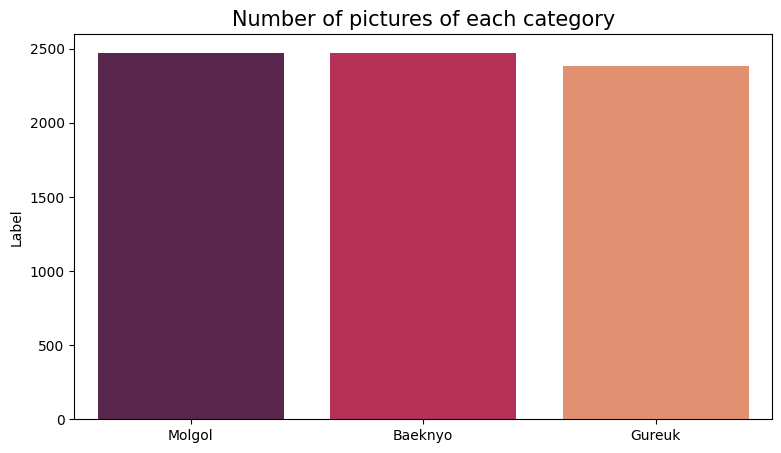

In [ ]:
vc = df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

## MediaPipe

In [49]:
image_path = '/content/imagedata/sumuk/img_data'

In [50]:
data = image_classifier.Dataset.from_folder(image_path)
train_data, remaining_data = data.split(0.8)
test_data, validation_data = remaining_data.split(0.5)

In [51]:
print(image_path)
labels = []
for i in os.listdir(image_path):
  if os.path.isdir(os.path.join(image_path, i)):
    labels.append(i)
print(labels)

/content/imagedata/sumuk/img_data
['0', '2', '1']


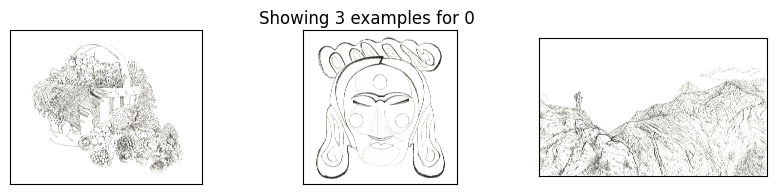

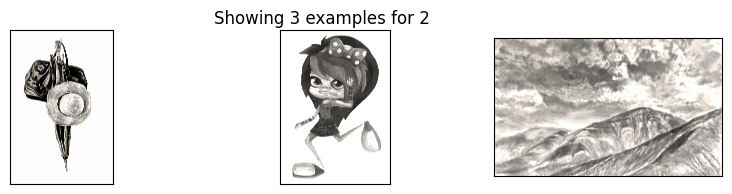

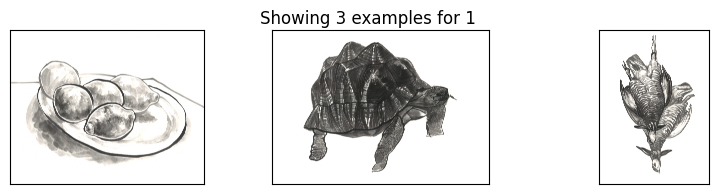

In [52]:
NUM_EXAMPLES = 3

for label in labels:
  label_dir = os.path.join(image_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [53]:
spec = image_classifier.SupportedModels.MOBILENET_V2
hparams = image_classifier.HParams(export_dir="exported_model")
options = image_classifier.ImageClassifierOptions(supported_model=spec, hparams=hparams)

In [ ]:
model = image_classifier.ImageClassifier.create(
    train_data = train_data,
    validation_data = validation_data,
    options=options,
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/10
2546/2546 [==============================] - 1211s 474ms/step - loss: 1.1979 - accuracy: 0.4322 - val_loss: 0.8826 - val_accuracy: 0.6295
Epoch 2/10
 597/2546 [======>.......................] - ETA: 7:51 - loss: 0.8915 - accuracy: 0.6005

In [ ]:
loss, acc = model.evaluate(test_data)
print(f'Test loss:{loss}, Test accuracy:{acc}')

In [ ]:
model.export_model()

In [ ]:
!ls exported_model
files.download('exported_model/model.tflite')

# Model tuning
You can use the MediaPipe Model Maker tool to further improve and adjust the model retraining with configuation options and performance techniques such as data quantization. These steps are optional. Model Maker uses reasonable default settings for all of the training configuration parameters, but if you want to further tune the model retraining, the instructions below describe the available options.

## Retraining parameters
You can further customize how the retraining process runs to adjust training time and potentially increase the retrained model's performance. These parameters are optional. Use the ImageClassifierOptions class and the HParams class to set these additional options.

Use the ImageClassifierOptions class parameters to customize the existing model. It has the following customizable parameter that affects model accuracy:

dropout_rate: The fraction of the input units to drop. Used in dropout layer. Defaults to 0.05.
Use the HParams class to customize other parameters related to training and saving the model:

- learning_rate: The learning rate to use for gradient descent training. Defaults to 0.001.
batch_size: Batch size for training. Defaults to 2.
epochs: Number of training iterations over the dataset. Defaults to 10.
steps_per_epoch: An optional integer that indicates the number of training steps per epoch. If not set, the training pipeline calculates the default steps per epoch as the training dataset size divided by batch size.
shuffle: True if the dataset is shuffled before training. Defaults to False.
do_fine_tuning: If true, the base module is trained together with the classification layer on top. This defaults to False, which means only the classification layer is trained and pre-trained weights for the base module are frozen.
l1_regularizer: A regularizer that applies a L1 regularization penalty. Defaults to 0.0.
l2_regularizer: A regularizer that applies a L2 regularization penalty. Defaults to 0.0001.
label_smoothing: Amount of label smoothing to apply. See tf.keras.losses for more details. Defaults to 0.1.
do_data_augmentation: Whether or not the training dataset is augmented by applying random transformations such as cropping, flipping, etc. See utils.image_preprocessing for details. Defaults to True.
decay_samples: Number of training samples used to calculate the decay steps and create the training optimizer. Defaults to 2,560,000.
warmup_epochs: Number of warmup steps for a linear increasing warmup schedule on the learning rate. Used to set up warmup schedule by model_util.WarmUp. Defaults to 2.
The following example code trains a model with more epochs and a higher dropout rate:

In [ ]:
hparams=image_classifier.HParams(epochs=15, export_dir="exported_model_2")
options = image_classifier.ImageClassifierOptions(supported_model=spec, dropout_rate=0.07, hparams=hparams)
model_2 = image_classifier.ImageClassifier.create(
    train_data = train_data,
    validation_data = validation_data,
    options=options,
)

In [ ]:
loss, accuracy = model_2.evaluate(test_data)

## 베이스 라인 모델

### 모델 전처리

In [ ]:
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2)

train_gen = train_datagen.flow_from_directory('/content/imagedata/sumuk/img',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory('/content/imagedata/sumuk/img',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 0 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


### 딥러닝 CNN모델로 베이스라인 모델

In [ ]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=8, activation='softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

### 모델 성능 확인(accuracy)

In [ ]:
cnn.fit(x = train_gen, validation_data = val_gen, epochs = 10)

## 모델 성능 높이기

### 데이터 증강으로 성능 높이기

In [ ]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(224, 224), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='categorical', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
        # 이미지 변경시 보완 방법 (constant, nearest, reflect, wrap) 4개 존재
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return train_generator,test_generator,train_images,val_images,test_images

### 전이학습을 사용해서 모델 성능 높이기

In [ ]:
models = {
    "DenseNet121": {"model":tf.keras.applications.DenseNet121, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "DenseNet201": {"model":tf.keras.applications.DenseNet201, "perf":0},
    "EfficientNetB0": {"model":tf.keras.applications.EfficientNetB0, "perf":0},
    "EfficientNetB1": {"model":tf.keras.applications.EfficientNetB1, "perf":0},
    "InceptionV3": {"model":tf.keras.applications.InceptionV3, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "MobileNetV3Large": {"model":tf.keras.applications.MobileNetV3Large, "perf":0},
    "ResNet152V2": {"model":tf.keras.applications.ResNet152V2, "perf":0},
    "ResNet50": {"model":tf.keras.applications.ResNet50, "perf":0},
    "ResNet50V2": {"model":tf.keras.applications.ResNet50V2, "perf":0},
    "VGG19": {"model":tf.keras.applications.VGG19, "perf":0},
    "VGG16": {"model":tf.keras.applications.VGG16, "perf":0},
    "Xception": {"model":tf.keras.applications.Xception, "perf":0}
}
# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')

def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}
    
    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.
    
    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(8, activation='softmax')(x)
    # 라벨 개수가 8개이기 때문에 Dencs도 8로 설정
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train모델 학습
for name, model in models.items():
    
    # 전이 학습 모델 가져오기
    m = get_model(model['model'])
    models[name]['model'] = m
    
    start = perf_counter()
    
    # 모델 학습
    history = m.fit(train_images,validation_data=val_images,epochs=1,verbose=0)
    
    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")
    
    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

## Test 데이터로 성능 확인

In [ ]:
# test데이터로 모델 성능 예측
for name, model in models.items():
    
    # Predict the label of the test_images
    pred = models[name]['model'].predict(test_images)
    pred = np.argmax(pred,axis=1)

    # Map the label
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    y_test = list(test_df.Label)
    acc = accuracy_score(y_test,pred)
    models[name]['acc'] = round(acc,4)
    print(f'**{name} has a {acc * 100:.2f}% accuracy on the test set**')
   
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['val_acc'][-1], 
                          models[name]['acc'],
                          models[name]['perf']])
    
df_results = pd.DataFrame(models_result, 
                          columns = ['model','val_accuracy','accuracy','Training time (sec)'])
df_results.sort_values(by='accuracy', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'accuracy', data = df_results)
plt.title('Accuracy on the test set (after 1 epoch))', fontsize = 15)
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'Training time (sec)', data = df_results)
plt.title('Training time for each model in sec', fontsize = 15)
# plt.ylim(0,20)
plt.xticks(rotation=90)
plt.show()

## 다른 모델로 성능 확인
### DenseNet201

In [ ]:
train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.DenseNet201)
history = model.fit(train_images,validation_data=val_images,epochs=7)

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()


In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
    
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

### ResNet152V2

In [ ]:
train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.ResNet152V2)
history = model.fit(train_images,validation_data=val_images,epochs=5)

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()


In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
    
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
printmd(f'# Accuracy on the test set: {acc * 100:.2f}%')

### 정밀도와 재현율 보기

In [ ]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

## Counfusion Matrix 시각화

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=False, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=False)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# 모델 테스트
## 한 장 테스트

In [ ]:
# from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
class_dictionary = {'airplane': 0,
                    'car': 1,
                    'cat': 2,
                    'dog': 3,
                    'flower': 4,
                    'fruit': 5,
                    'motorbike': 6,
                    'person': 7}
IMAGE_SIZE    = (224, 224)
number_1 = int(input("번호를 입력하세요 : ")) # 10, 50, 100
test_image = image.load_img(test_df.iloc[number_1, 0]
                            ,target_size =IMAGE_SIZE )
test_image = image.img_to_array(test_image)
plt.imshow(test_image/255.);

test_image = test_image.reshape((1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))
test_image = preprocess_input(test_image)
prediction = model.predict(test_image)

df = pd.DataFrame({'pred':prediction[0]})
df = df.sort_values(by='pred', ascending=False, na_position='first')
printmd(f"## 예측률 : {(df.iloc[0]['pred'])* 100:.2f}%")

for x in class_dictionary:
  if class_dictionary[x] == (df[df == df.iloc[0]].index[0]):
    printmd(f"### Class prediction = {x}")
    break

## 여러장 테스트

In [ ]:
# Display picture of the dataset with their labels
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}", fontsize = 15)
plt.tight_layout()
plt.show()